# Basic time series

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr
import datetime as dt

/home/son/anaconda3/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# download 1 US stock
def download_one_stock(ticker='GOOG', start=dt.datetime(2019,1,1).date(),
                      end=dt.datetime(2020,1,1).date(),
                      cols=['Adj Close', 'Volume']):
    return pdr.get_data_yahoo(ticker, start, end)[cols]
    

In [7]:
df = download_one_stock()
df.head()

,Adj Close,Volume
Date,,
2018-12-31,1035.609985,1493300
2019-01-02,1045.849976,1532600
2019-01-03,1016.059998,1841100
2019-01-04,1070.709961,2093900
2019-01-07,1068.390015,1981900


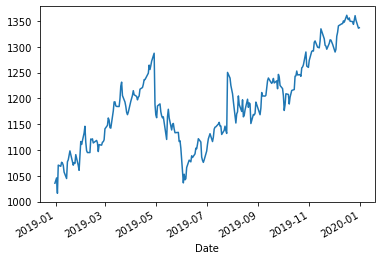

In [8]:
# Simple line plot
df['Adj Close'].plot()

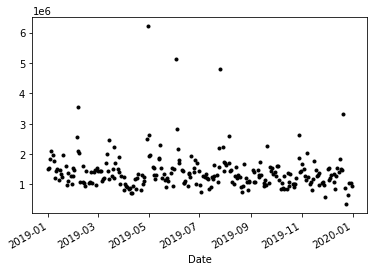

In [11]:
df['Volume'].plot(style='k.')

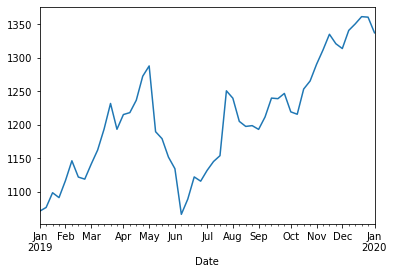

In [19]:
# group prices with frequency 1 week
w_groups = df['Adj Close'].groupby(pd.Grouper(freq='1W'))
# maximum weekly prices
w_groups.max().plot()

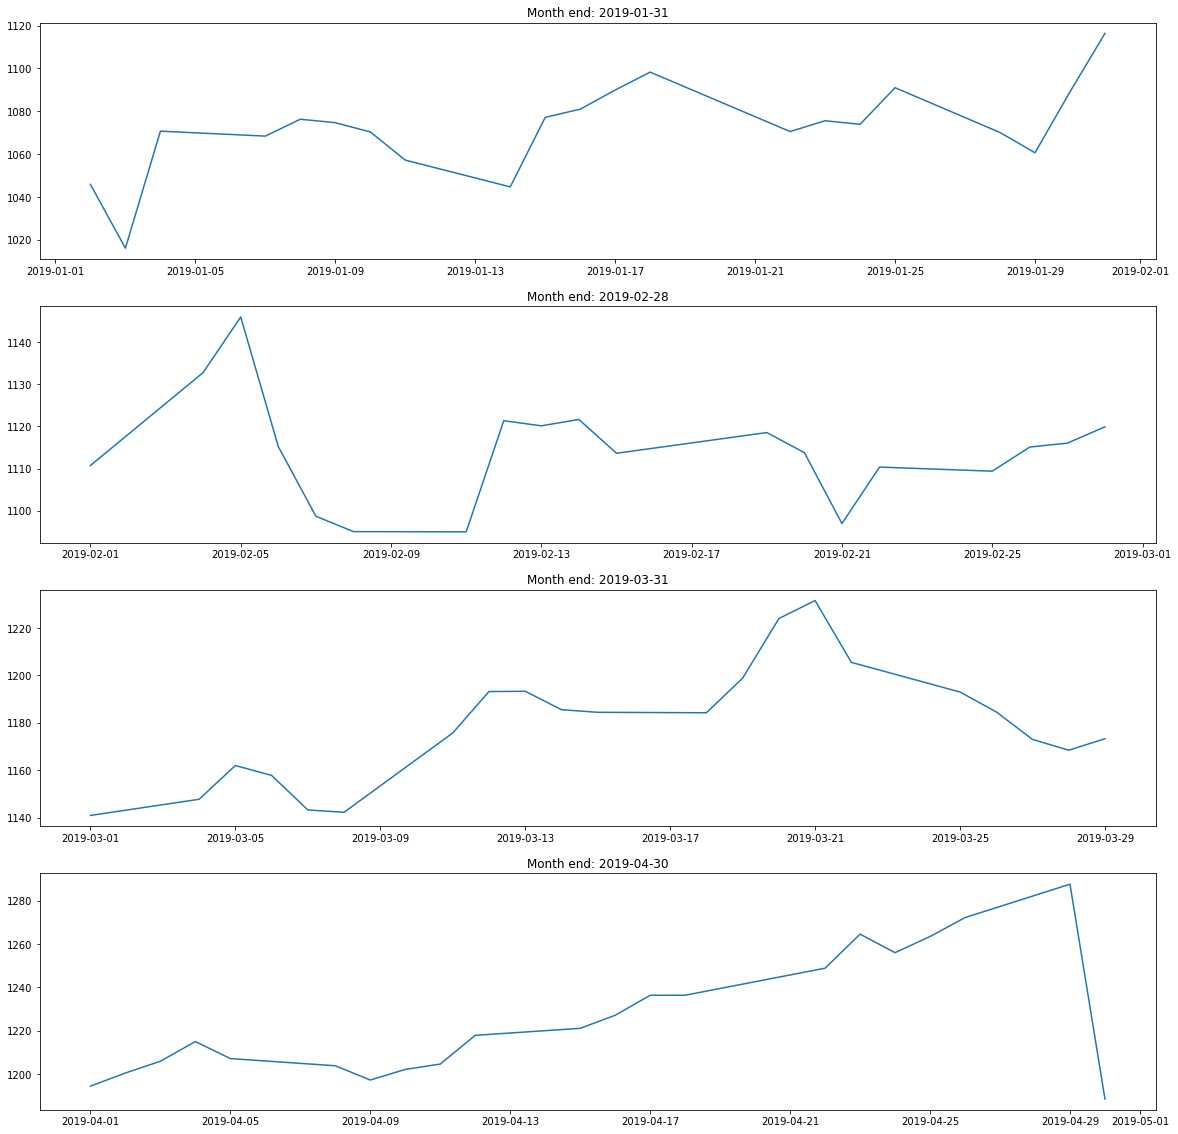

In [75]:
m_groups = df['Adj Close'].groupby(pd.Grouper(freq='1M'))

# loop through months to plot
n = len(m_groups)
fig, axs = plt.subplots(4, figsize=(20,20))
iterator = iter(m_groups)
done_looping = False
count = 0
while not done_looping:
    try:
        month = next(iterator)
    except StopIteration:
        done_looping = True
    else:
        if count > 0 and count < 5:
            axs[count-1].set_title('Month end: {}'.format(month[0].date()))
            axs[count-1].plot(month[1])
        count += 1